In [2]:
import numpy as np

In [3]:
B = np.load('./NOAA12673_HARP7115_20170906_083600_TAI.npy')

In [4]:
B.shape

(344, 224, 160, 3)

In [5]:
Bx = B[:, :, :, 0]
By = B[:, :, :, 1]
Bz = B[:, :, :, 2]

In [25]:
import drms
from pathlib import Path

In [29]:
jsoc_email = 'mgjeon@khu.ac.kr'
client = drms.Client(email=jsoc_email, verbose=True)
path = Path('./NOAA12673_HARP7115')
path.mkdir(parents=True, exist_ok=True)
ds = 'hmi.sharp_cea_720s[7115][2017-09-06_08:34:42]{Bp, Bt, Br}'
r = client.export(ds, protocol='fits')
r.wait()
download_results = r.download(path)
download_results

Export request pending. [id=JSOC_20230203_276, status=2]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230203_276, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230203_276, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230203_276, status=1]
Waiting for 5 seconds...
    record: hmi.sharp_cea_720s[7115][2017.09.06_08:36:00_TAI]
  filename: hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp.fits
  -> NOAA12673_HARP7115/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp.fits
    record: hmi.sharp_cea_720s[7115][2017.09.06_08:36:00_TAI]
  filename: hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt.fits
  -> NOAA12673_HARP7115/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt.fits
    record: hmi.sharp_cea_720s[7115][2017.09.06_08:36:00_TAI]
  filename: hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits
  -> NOAA12673_HARP7115/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits


In [6]:
import matplotlib.pyplot as plt
from sunpy.map import Map

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
hmi_p = './NOAA12673_HARP7115/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp.fits'
hmi_t = './NOAA12673_HARP7115/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt.fits'
hmi_r = './NOAA12673_HARP7115/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits'

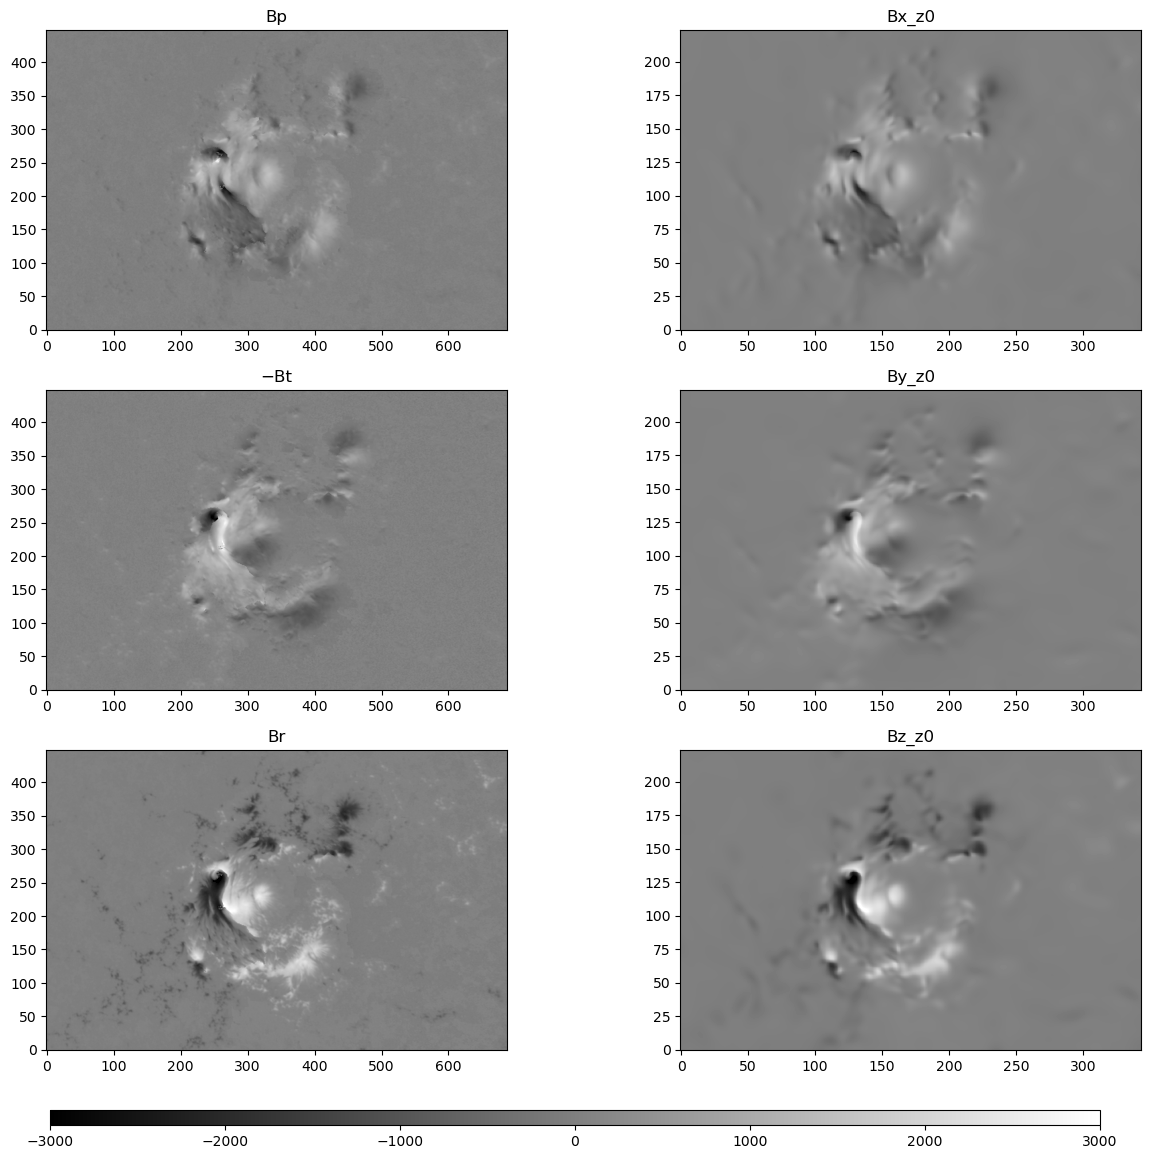

In [19]:
Bx_z0 = Bx[:, :, 0].transpose()
By_z0 = By[:, :, 0].transpose()
Bz_z0 = Bz[:, :, 0].transpose()

Bp = Map(hmi_p).data
Bt = Map(hmi_t).data
Br = Map(hmi_r).data

vmax = 3000
vmin = -3000

fig, axes = plt.subplots(3,2, figsize=(15, 15))
im = axes[0,0].imshow(Bp, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0,0].set_title('Bp')
axes[1,0].imshow(-Bt, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1,0].set_title('−Bt')
axes[2,0].imshow(Br, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[2,0].set_title('Br')

axes[0,1].imshow(Bx_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[0,1].set_title('Bx_z0')
axes[1,1].imshow(By_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[1,1].set_title('By_z0')
axes[2,1].imshow(Bz_z0, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
axes[2,1].set_title('Bz_z0')

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.01])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

fig.savefig('./NOAA12673_HARP7115.png', dpi=300)